<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Arboles/blob/main/2_Arboles_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/XavierCarrera/Tutorial-Machine-Learning-Arboles/main/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Análisis de Datos

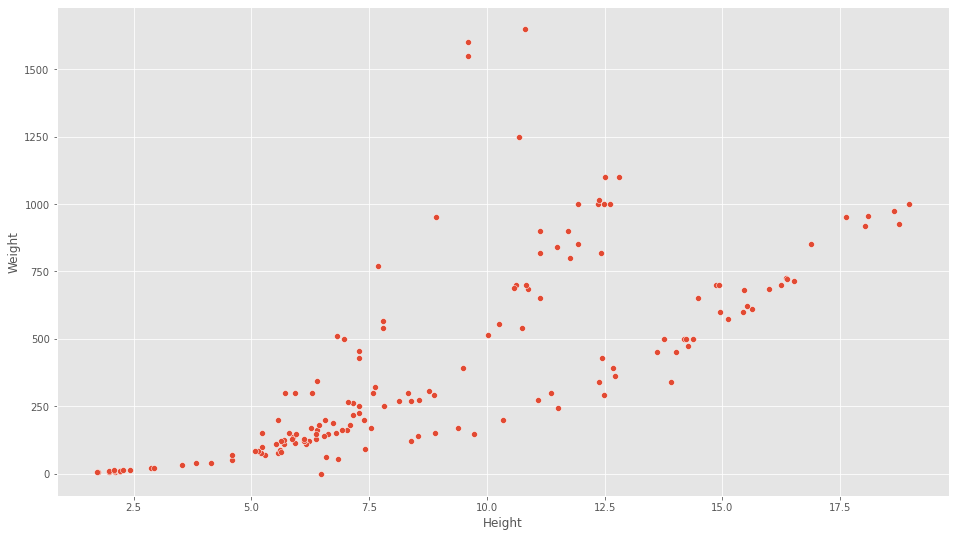

In [ ]:
sns.scatterplot(data=df, x="Height", y="Weight")

# Entrenamiento de Modelo

In [3]:
X = df.drop(["Species"], axis=1)
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [4]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8125

# Visualización del Árbol

[Text(532.2461538461538, 471.76714285714286, 'X[4] <= 12.438\ngini = 0.778\nsamples = 127\nvalue = [25, 10, 47, 14, 19, 9, 3]'),
 Text(463.5692307692307, 436.82142857142856, 'X[1] <= 39.9\ngini = 0.733\nsamples = 102\nvalue = [2, 10, 45, 14, 19, 9, 3]'),
 Text(429.2307692307692, 401.87571428571425, 'X[4] <= 3.23\ngini = 0.699\nsamples = 93\nvalue = [2, 10, 45, 5, 19, 9, 3]'),
 Text(274.7076923076923, 366.93, 'X[2] <= 9.45\ngini = 0.18\nsamples = 10\nvalue = [0, 0, 1, 0, 0, 9, 0]'),
 Text(240.36923076923077, 331.9842857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]'),
 Text(309.04615384615386, 331.9842857142857, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 9, 0]'),
 Text(583.7538461538461, 366.93, 'X[2] <= 27.15\ngini = 0.647\nsamples = 83\nvalue = [2, 10, 44, 5, 19, 0, 3]'),
 Text(377.7230769230769, 331.9842857142857, 'X[4] <= 6.569\ngini = 0.663\nsamples = 52\nvalue = [2, 10, 22, 0, 18, 0, 0]'),
 Text(274.7076923076923, 297.03857142857146, 'X[4] <= 6.112\ngini = 

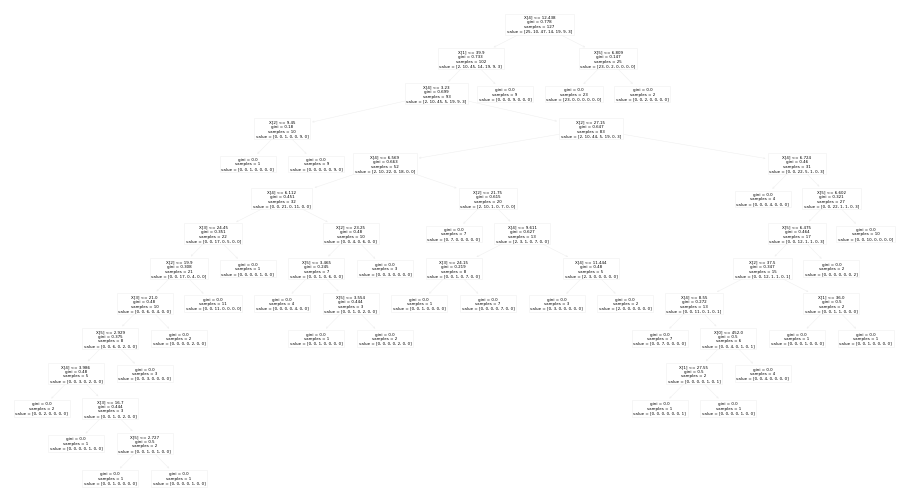

In [7]:
tree.plot_tree(clf) 